<a href="https://colab.research.google.com/github/Amal-Nasir/CNN_Colab/blob/main/CNN_Spic_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd ..

/


In [ ]:
cd content/drive/MyDrive/MedIx\ REU/Datasets

/content/drive/MyDrive/MedIx REU/Datasets


In [ ]:
from __future__ import absolute_import
from __future__ import print_function
import tensorflow as tf
import numpy as np  # linear alg
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import keras
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, Lambda
from keras import backend as K
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.svm import SVC # for Support Vector Classification model
import os
from os import path

In [ ]:
##### Import Trained Model #####
model = keras.models.load_model("/content/drive/MyDrive/MedIx REU/Datasets/Amal/CNN/Spiculation/CNN_model_All" , compile = True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 69, 69, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 12544)             0

In [ ]:
feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(name="flatten").output)

In [ ]:
feature_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 71, 71, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 69, 69, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928 

In [ ]:
def getNormed(this_array, this_min = 0, this_max = 255, set_to_int = True):
    new_var = this_array.copy()
    rat = (this_max - this_min)/(new_var.max() - new_var.min())
    new_var = new_var * rat
    new_var -= new_var.min()
    new_var += this_min
    if set_to_int:
        return new_var.astype('uint8')
    return new_var

In [ ]:
training_data = pd.read_csv("/content/drive/MyDrive/MedIx REU/Datasets/Amal/CNN/Spiculation/training_2class.csv")
testing_data = pd.read_csv("/content/drive/MyDrive/MedIx REU/Datasets/Amal/CNN/Spiculation/test_2class.csv")

In [ ]:
train_nodIds = np.array(training_data['noduleID'])
test_nodIds = np.array(testing_data['noduleID'])

In [ ]:
total = pd.read_csv("/content/drive/MyDrive/MedIx REU/Datasets/Amal/CNN/Spiculation/Agreement_Binary_Rating.csv")
total_nod = total['noduleID']
total_nod = np.array(total_nod)

image_folder = '/content/drive/MyDrive/MedIx REU/Datasets/Amal/images_1332'
train_images = []
train_noduleId = []
print(image_folder)

'''for dir1 in os.listdir(image_folder):
    print(dir1)
    if not dir1.startswith('.'):
        for file in os.listdir(os.path.join(image_folder, dir1)):
            #print(file)
            noduleID = file.split('.')[0]
            if not file.startswith('.'):
                noduleID = int(noduleID)
                train_noduleId.append(noduleID)
                temp_image = np.loadtxt(os.path.join(image_folder, dir1,file))
                temp_image = getNormed(temp_image)
                train_images.append(temp_image)'''

train_images = []
val_images = []
test_images = []
train_noduleId = []
val_noduleId = []
test_noduleId = []
print(image_folder)

for dir1 in os.listdir(image_folder):
    print(dir1)
    if not dir1.startswith('.'):
        for file in os.listdir(os.path.join(image_folder, dir1)):
            #print(file)
            noduleID = file.split('.')[0]
            if not file.startswith('.'):
                noduleID = int(noduleID)
                if noduleID in train_nodIds:
                    train_noduleId.append(noduleID)
                    temp_image = np.loadtxt(os.path.join(image_folder, dir1,file))
                    temp_image = getNormed(temp_image)
                    #enlarged_img = getSamePadding(temp_image)
                    train_images.append(temp_image)

                if noduleID in test_nodIds:
                    test_noduleId.append(noduleID)
                    temp_image = np.loadtxt(os.path.join(image_folder, dir1,file))
                    temp_image = getNormed(temp_image)
                    test_images.append(temp_image)

/content/drive/MyDrive/MedIx REU/Datasets/Amal/images_1332
/content/drive/MyDrive/MedIx REU/Datasets/Amal/images_1332
Malignancy_5
Malignancy_1
Malignancy_4
Malignancy_2
Malignancy_3


In [ ]:
print(len(train_noduleId))
print(len(test_noduleId))

1066
266


In [ ]:
tr_df = pd.DataFrame(train_noduleId,columns =['noduleID'])
print(tr_df)

      noduleID
0          324
1         1888
2         1606
3         1427
4         1760
...        ...
1061       285
1062       389
1063      2301
1064      1772
1065      2540

[1066 rows x 1 columns]


In [ ]:
train_slices = pd.merge(tr_df, training_data)
display(train_slices)

,noduleID,Unnamed: 0,InstanceID,Dataset,Binary Rating,Bin_Rating,Binary_Rating_name,Agreement,Agreement_name,Two_Agreement,Two_Agreement_name,Category
0,324,177,4732,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
1,1888,972,28743,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
2,1606,859,24119,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
3,1427,775,21366,2,1,1,Spiculated,2,High Radiologist Agreement,1,Full_High,Training
4,1760,922,26447,2,1,1,Spiculated,3,All Radiologist Agreement,1,Full_High,Training
...,...,...,...,...,...,...,...,...,...,...,...,...
1061,285,159,4134,2,1,1,Spiculated,2,High Radiologist Agreement,1,Full_High,Training
1062,389,217,5683,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
1063,2301,1162,35200,2,0,0,Not Spiculated,2,High Radiologist Agreement,1,Full_High,Training
1064,1772,929,26626,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None


In [ ]:
te_df = pd.DataFrame(test_noduleId,columns =['noduleID'])
print(te_df)

     noduleID
0        2600
1        2000
2          53
3        1965
4        1088
..        ...
261       916
262      1998
263        72
264      2583
265       231

[266 rows x 1 columns]


In [ ]:
test_slices = pd.merge(te_df, testing_data)
display(test_slices)

,noduleID,Unnamed: 0,InstanceID,Dataset,Binary Rating,Bin_Rating,Binary_Rating_name,Agreement,Agreement_name,Two_Agreement,Two_Agreement_name,Category
0,2600,1302,39904,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
1,2000,1020,30093,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Testing
2,53,30,695,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
3,1965,1005,29654,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
4,1088,606,15957,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
...,...,...,...,...,...,...,...,...,...,...,...,...
261,916,516,13388,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Training
262,1998,1019,30087,2,0,0,Not Spiculated,2,High Radiologist Agreement,1,Full_High,Training
263,72,42,1042,2,0,0,Not Spiculated,2,High Radiologist Agreement,1,Full_High,Training
264,2583,1292,39596,2,0,0,Not Spiculated,2,High Radiologist Agreement,1,Full_High,Training


In [ ]:
###### Retrieve the embeddings, run KNN analysis, and print tsne for TRAINING AND VALIDATION DATA COMBINED #####
# First, need to extract only training and validation indices from all data
##### Run all data (testing, training, and validation) to retrieve embeddings and plot tsne #####                               USE THIS ONE! :)
# read in file with all of the data

#total = pd.read_csv("/content/drive/MyDrive/MedIx REU/Datasets/Amal/CNN/Spiculation/1332_images_71X71.csv")
#total_ids = total['InstanceID']

#total_images = total.drop(['InstanceID','Binary_Rating_Spic'], axis=1)
#print(total_images.head(5))

total_data = np.array(train_images).reshape(-1,71,71,1)


# get the embeddings feature_extractor
total_embeddings_before = feature_extractor.predict(total_data)
#total_embeddings_before = model.predict(total_data)
#total_embeddings2 = (total_embeddings_before[0] - total_embeddings_before[0].min()) / (total_embeddings_before[0].max() - total_embeddings_before[0].min())
total_embeddings2 = (total_embeddings_before - total_embeddings_before.min()) / (total_embeddings_before.max() - total_embeddings_before.min())
#tot_embedded2 = TSNE(n_components=2,random_state=2).fit_transform(total_embeddings2)

34/34 [==============================] - 9s 5ms/step


In [ ]:
total_data.shape

(1066, 71, 71, 1)

In [ ]:
total_embeddings_before.shape

(1066, 12544)

In [ ]:
total_embeddings2.shape

(1066, 12544)

In [ ]:
total_embeddings2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
total_test_data = np.array(test_images).reshape(-1,71,71,1)

# get the embeddings feature_extractor
test_embeddings_before = feature_extractor.predict(total_test_data)
test_embeddings2 = (test_embeddings_before - test_embeddings_before.min()) / (test_embeddings_before.max() - test_embeddings_before.min())

9/9 [==============================] - 0s 2ms/step


In [ ]:
total_test_data.shape

(266, 71, 71, 1)

In [ ]:
train_agreements = train_slices['Two_Agreement']
test_agreements = test_slices['Two_Agreement']

In [ ]:
import itertools
#creating cunfusion matrix

def custom_confusion_matrix(y_true, y_pred, classes=None,figsize=(15,15), text_size=15):
    #figsize = (10,10)
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]#normalize the confusion matrix
    n_classes = cm.shape[0]

    #adjusting the cunfusion matrix
    fig, ax = plt.subplots(figsize=figsize)
    #Creating a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    #create classes
    #classes = False
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    #Label the axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted Label",
          ylabel="True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)
    #Set axis label to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    #Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)
    #Set threshold for diffferent colors
    threshold = (cm.max() + cm.min())/2.

    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100: .1f}%)",
                horizontalalignment="center",
                color="white" if cm[i,j]>threshold else "black",
                size = text_size)

In [ ]:
def fitting(X_train, X_test, y_train, y_test, C, gamma):
    # Create training and testing samples
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    # Note, available kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
    model = SVC(kernel='rbf', probability=True, C=C, gamma=gamma)
    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)

    # Use score method to get accuracy of the model
    print('----- Evaluation on Test Data -----')
    classes_name = ["Low_No", "Full_High"]
    custom_confusion_matrix(y_test,
                       pred_labels_te,
                       classes_name,
                       (15,15),
                       10)
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')

    print('----- Evaluation on Training Data -----')
    custom_confusion_matrix(y_train,
                       pred_labels_tr,
                       classes_name,
                       (15,15),
                       10)
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')

    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf

----- Evaluation on Test Data -----
Accuracy Score:  0.5864661654135338
              precision    recall  f1-score   support

           0       0.58      0.42      0.49       125
           1       0.59      0.73      0.65       141

    accuracy                           0.59       266
   macro avg       0.59      0.58      0.57       266
weighted avg       0.59      0.59      0.58       266

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.851782363977486
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       480
           1       0.82      0.94      0.87       586

    accuracy                           0.85      1066
   macro avg       0.86      0.84      0.85      1066
weighted avg       0.86      0.85      0.85      1066

--------------------------------------------------------


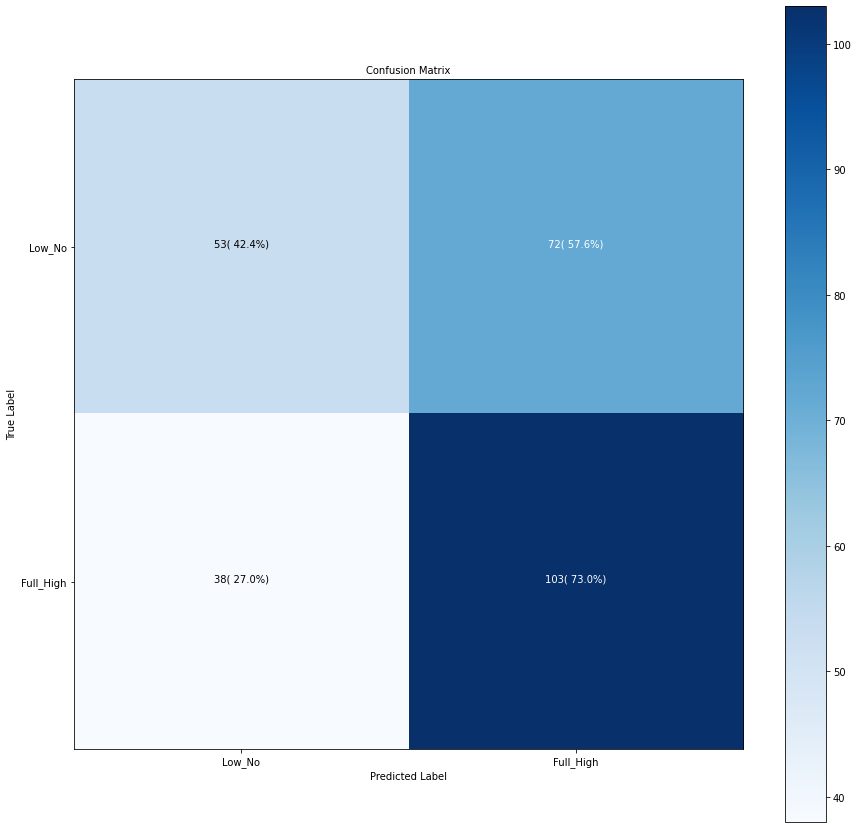

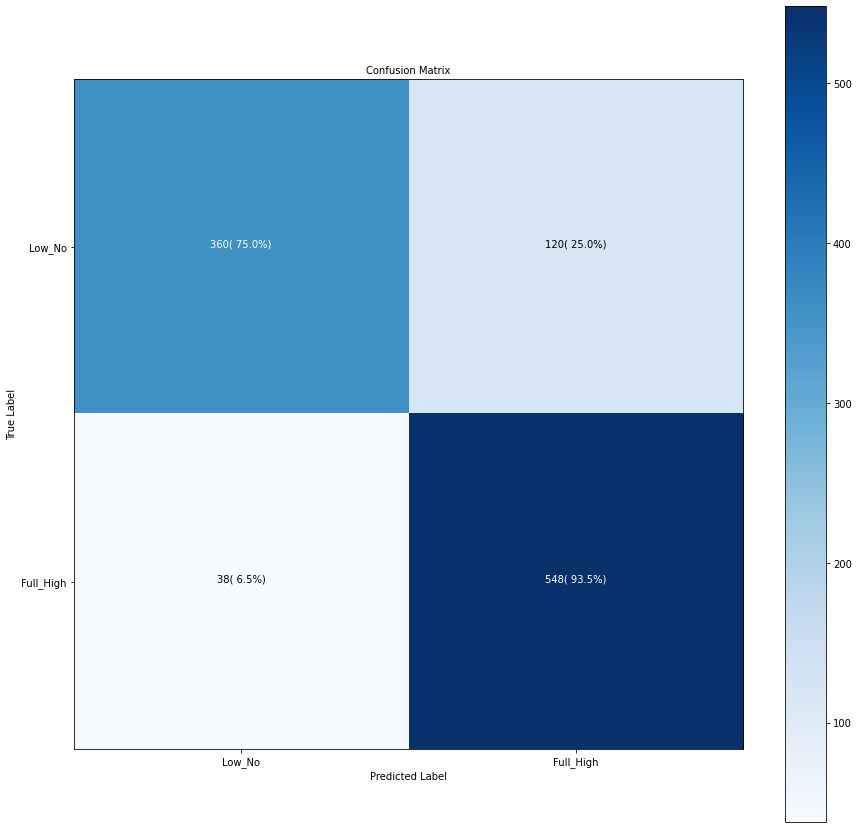

In [ ]:
# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(total_embeddings2, test_embeddings2, train_agreements, test_agreements, 1, 'scale')

----- Evaluation on Test Data -----
Accuracy Score:  0.575187969924812
              precision    recall  f1-score   support

           0       0.57      0.38      0.46       125
           1       0.58      0.74      0.65       141

    accuracy                           0.58       266
   macro avg       0.57      0.56      0.55       266
weighted avg       0.57      0.58      0.56       266

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.8114446529080676
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       480
           1       0.78      0.91      0.84       586

    accuracy                           0.81      1066
   macro avg       0.82      0.80      0.80      1066
weighted avg       0.82      0.81      0.81      1066

--------------------------------------------------------


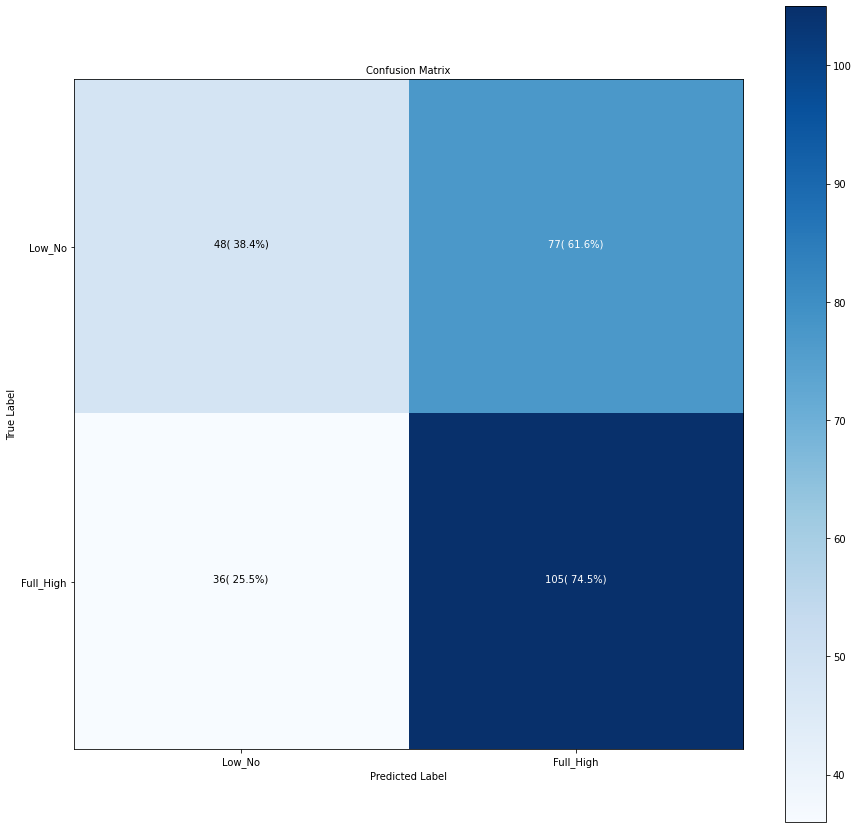

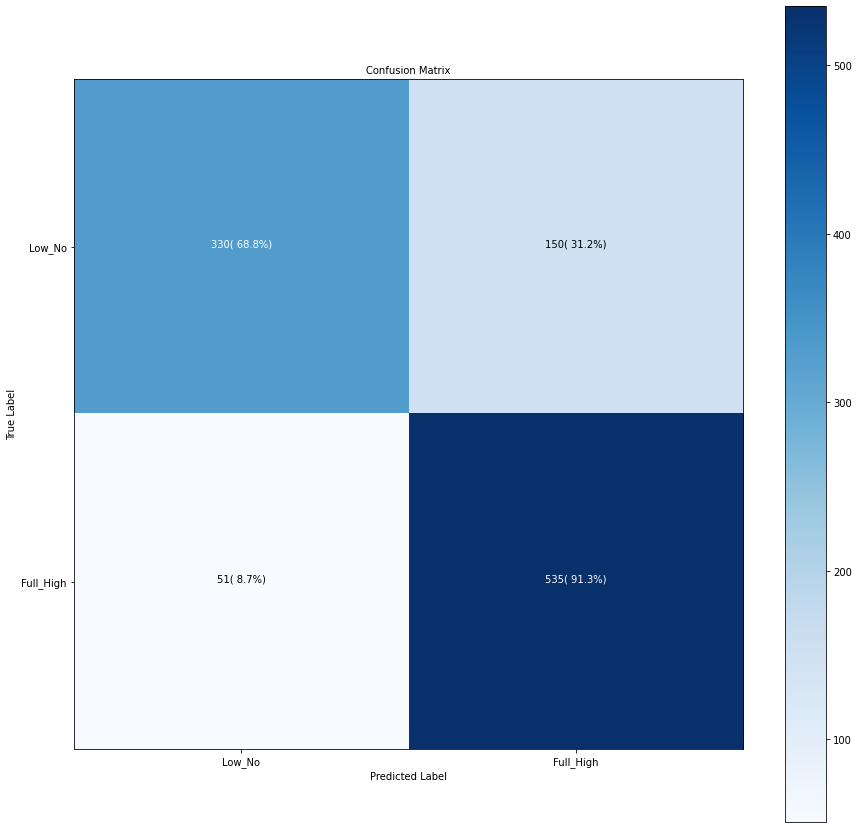

In [ ]:
# Fit the model and display results
#X_train, X_test, y_train, y_test, clf = fitting(total_embeddings2, agreements, 1,  0.1)
X_train, X_test, y_train, y_test, clf = fitting(total_embeddings2, test_embeddings2, train_agreements, test_agreements, 1, 0.1)

----- Evaluation on Test Data -----
Accuracy Score:  0.5300751879699248
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       125
           1       0.53      1.00      0.69       141

    accuracy                           0.53       266
   macro avg       0.27      0.50      0.35       266
weighted avg       0.28      0.53      0.37       266

--------------------------------------------------------
----- Evaluation on Training Data -----


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score:  0.549718574108818
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       480
           1       0.55      1.00      0.71       586

    accuracy                           0.55      1066
   macro avg       0.27      0.50      0.35      1066
weighted avg       0.30      0.55      0.39      1066

--------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


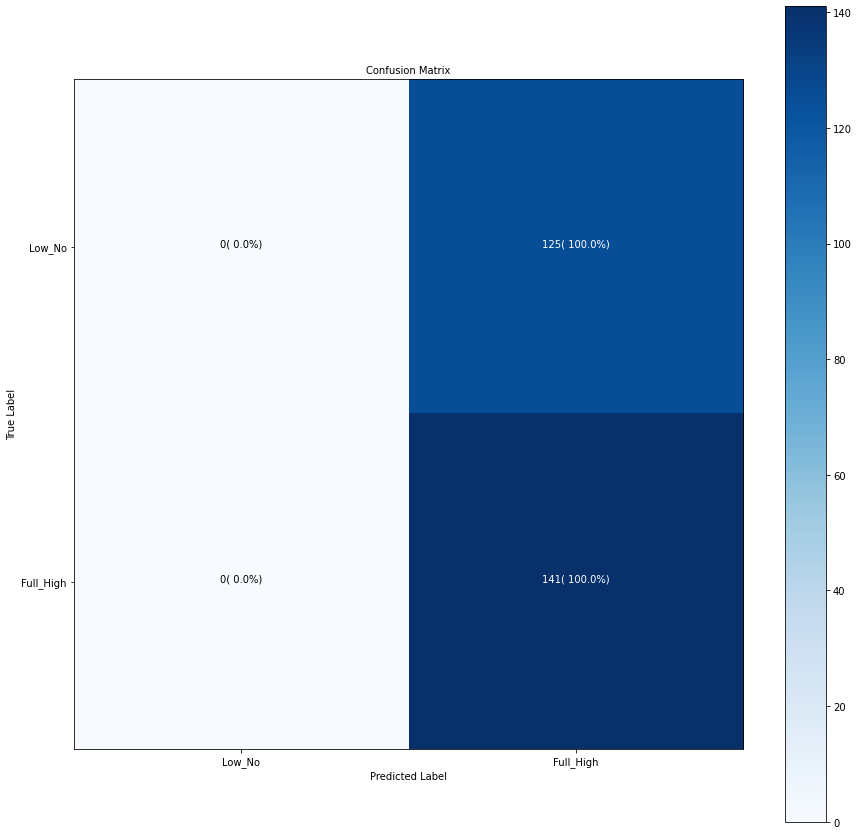

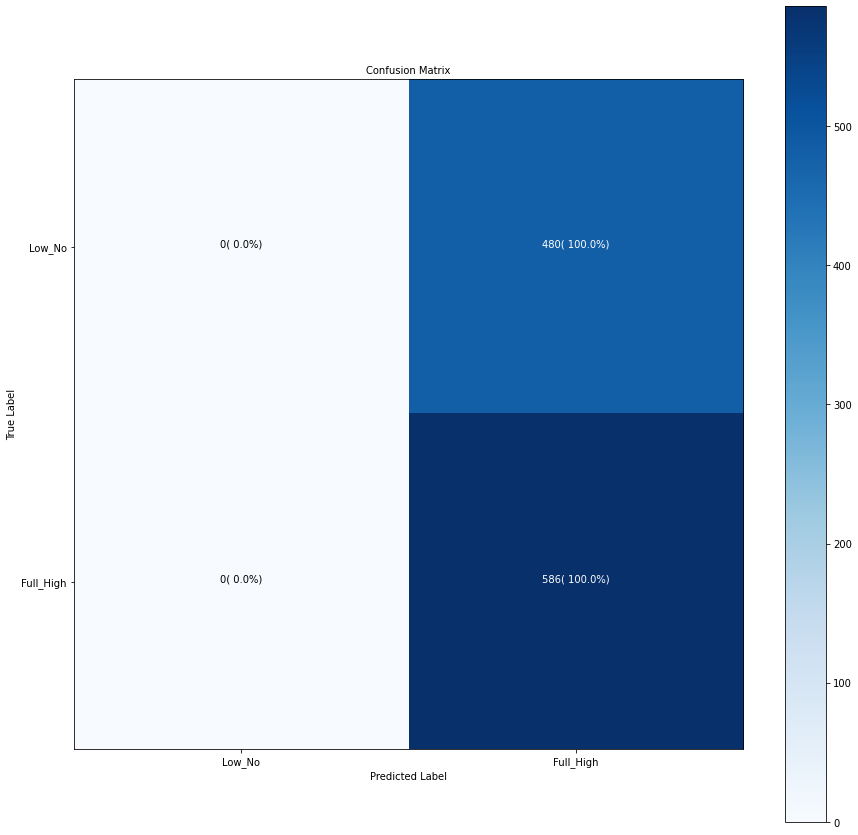

In [ ]:
# Fit the model and display results
#X_train, X_test, y_train, y_test, clf = fitting(total_embeddings2, agreements, 1, 0.000001)
X_train, X_test, y_train, y_test, clf = fitting(total_embeddings2, test_embeddings2, train_agreements, test_agreements, 1, 0.000001)